# Import Libereies

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#read the CSV file into a DataFrame
df = pd.read_csv('diabetes.csv')



In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data info

In [4]:
# see information of data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check missing value
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# check duplicted values
df.duplicated().sum()

0

there is no missing values or duplicated values

In [7]:
# see # descriptive statistics of the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA


In [8]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


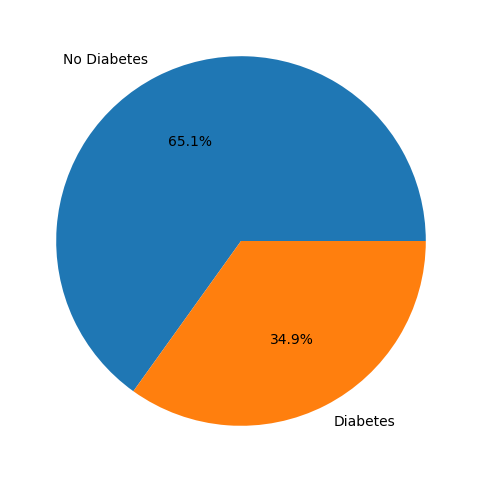

In [9]:
plt.figure(figsize=(10, 6))
fig = plt.pie( df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'],autopct='%1.1f%%')
plt.show()

it is not balanced data and   People who have diabetes('1') are less than Not diabetes(0)


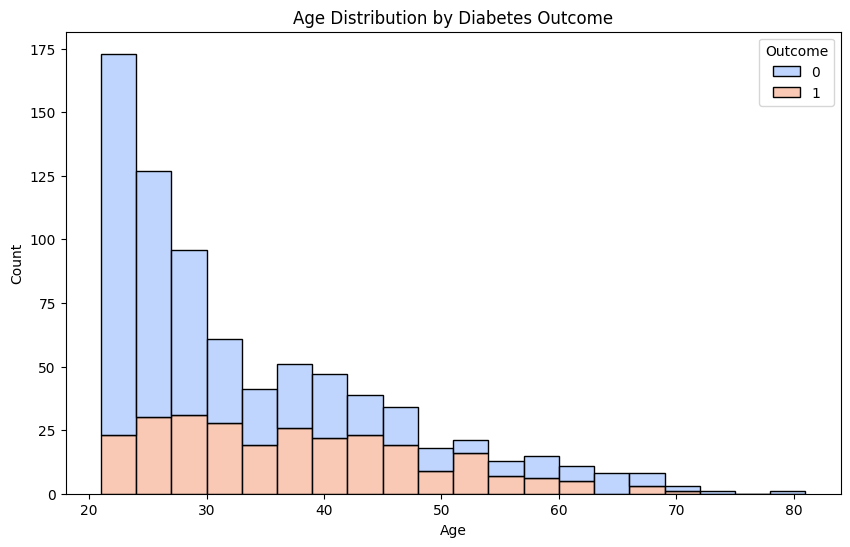

In [10]:
# Plotting a histogram to show the distribution of age for each outcome
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Outcome', multiple='stack', palette='coolwarm', bins=20)
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The range of ages for both outcomes overlaps but not diabetes is in youngest peoples in this dataset

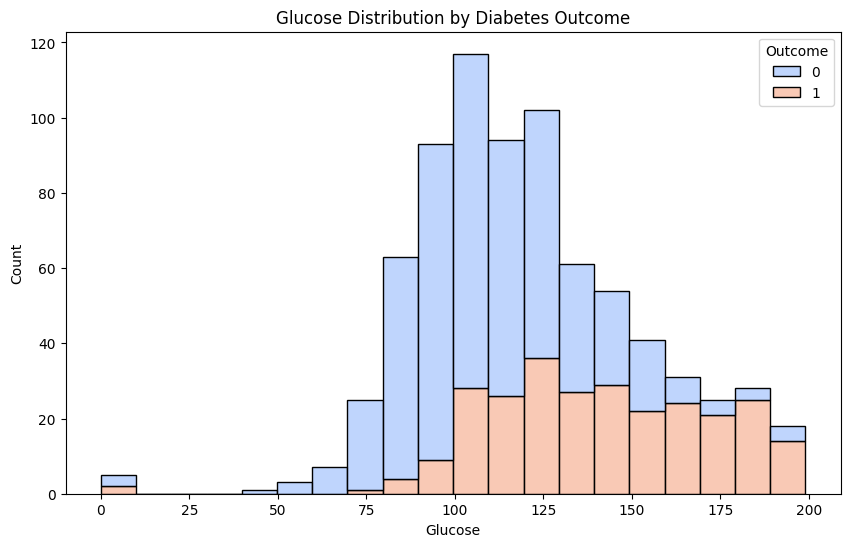

In [11]:
# Plotting a histogram to show the distribution of Glucose for each outcome
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Glucose', hue='Outcome', multiple='stack', palette='coolwarm', bins=20)
plt.title('Glucose Distribution by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

people who have more Plasma glucose is diabetes

In [12]:
d=df.groupby(['Outcome'])[['Insulin','SkinThickness']].mean()


<Axes: xlabel='Outcome', ylabel='SkinThickness'>

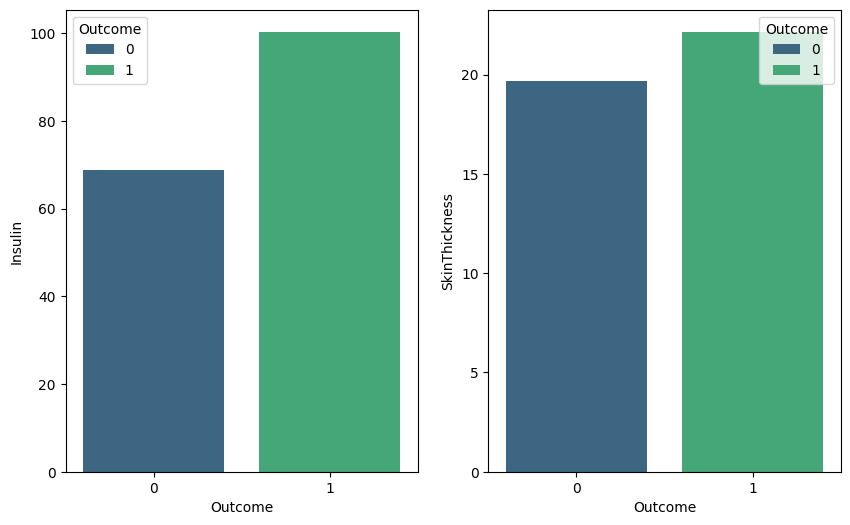

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=d.index,y=d.Insulin,palette='viridis',hue=d.index)
plt.subplot(1, 2, 2)
sns.barplot(x=d.index,y=d.SkinThickness,palette='viridis',hue=d.index)


so diabetes have average skinthickness=22 and average of insulin=100


not diabetes have average skinthickness=19 and average of insulin=70


In [55]:
import plotly.express as px

fig = px.violin(df, x='Outcome', y='DiabetesPedigreeFunction', color='Outcome',
                box=True, points="all",
                title='Distribution of DiabetesPedigreeFunction by Outcome',
                labels={'Outcome': 'Outcome', 'DiabetesPedigreeFunction': 'DiabetesPedigreeFunction'},height=500)

fig.update_layout(
    title_x=0.5,
)

fig.show()

diabetes range is from 0.24 to 0.34 and no diabetes is below that

In [15]:
import plotly.express as px
import pandas as pd

p = df.copy()
bins = [0, 18.5, 24.9, 29.9, 39.9, 70]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']
p['BMI Category'] = pd.cut(p['BMI'], bins=bins, labels=labels, include_lowest=True)

p_grouped = p.groupby(['BMI Category', 'Outcome']).size().reset_index(name='Count')

total_count = p_grouped['Count'].sum()
p_grouped['Percentage'] = (p_grouped['Count'] / total_count) * 100

fig = px.sunburst(
    p_grouped,
    path=['BMI Category', 'Outcome'],
    values='Count',
    color='Outcome',
    title='Sunburst Plot of BMI Categories and Outcome with Percentages',
    hover_data={'Count': True, 'Percentage': ':.2f%'}
)
fig = fig.update_traces(textinfo="label+percent parent")
fig.show()

<ipython-input-15-21ba16b4cf70>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




49% of data is (obese) and 56% of them are not diabetes,44% is diabetes...
23% of data is (overweight) and 78% of them are not diabetes,22% is diabetes...
13% of data is (Normal) and 93% of them are not diabetes,7% is diabetes...
13% of data is (extermely obese) and 44% of them are not diabetes,56% is diabetes...
2% of data is (underweight) and 87% of them are not diabetes,13% is diabetes

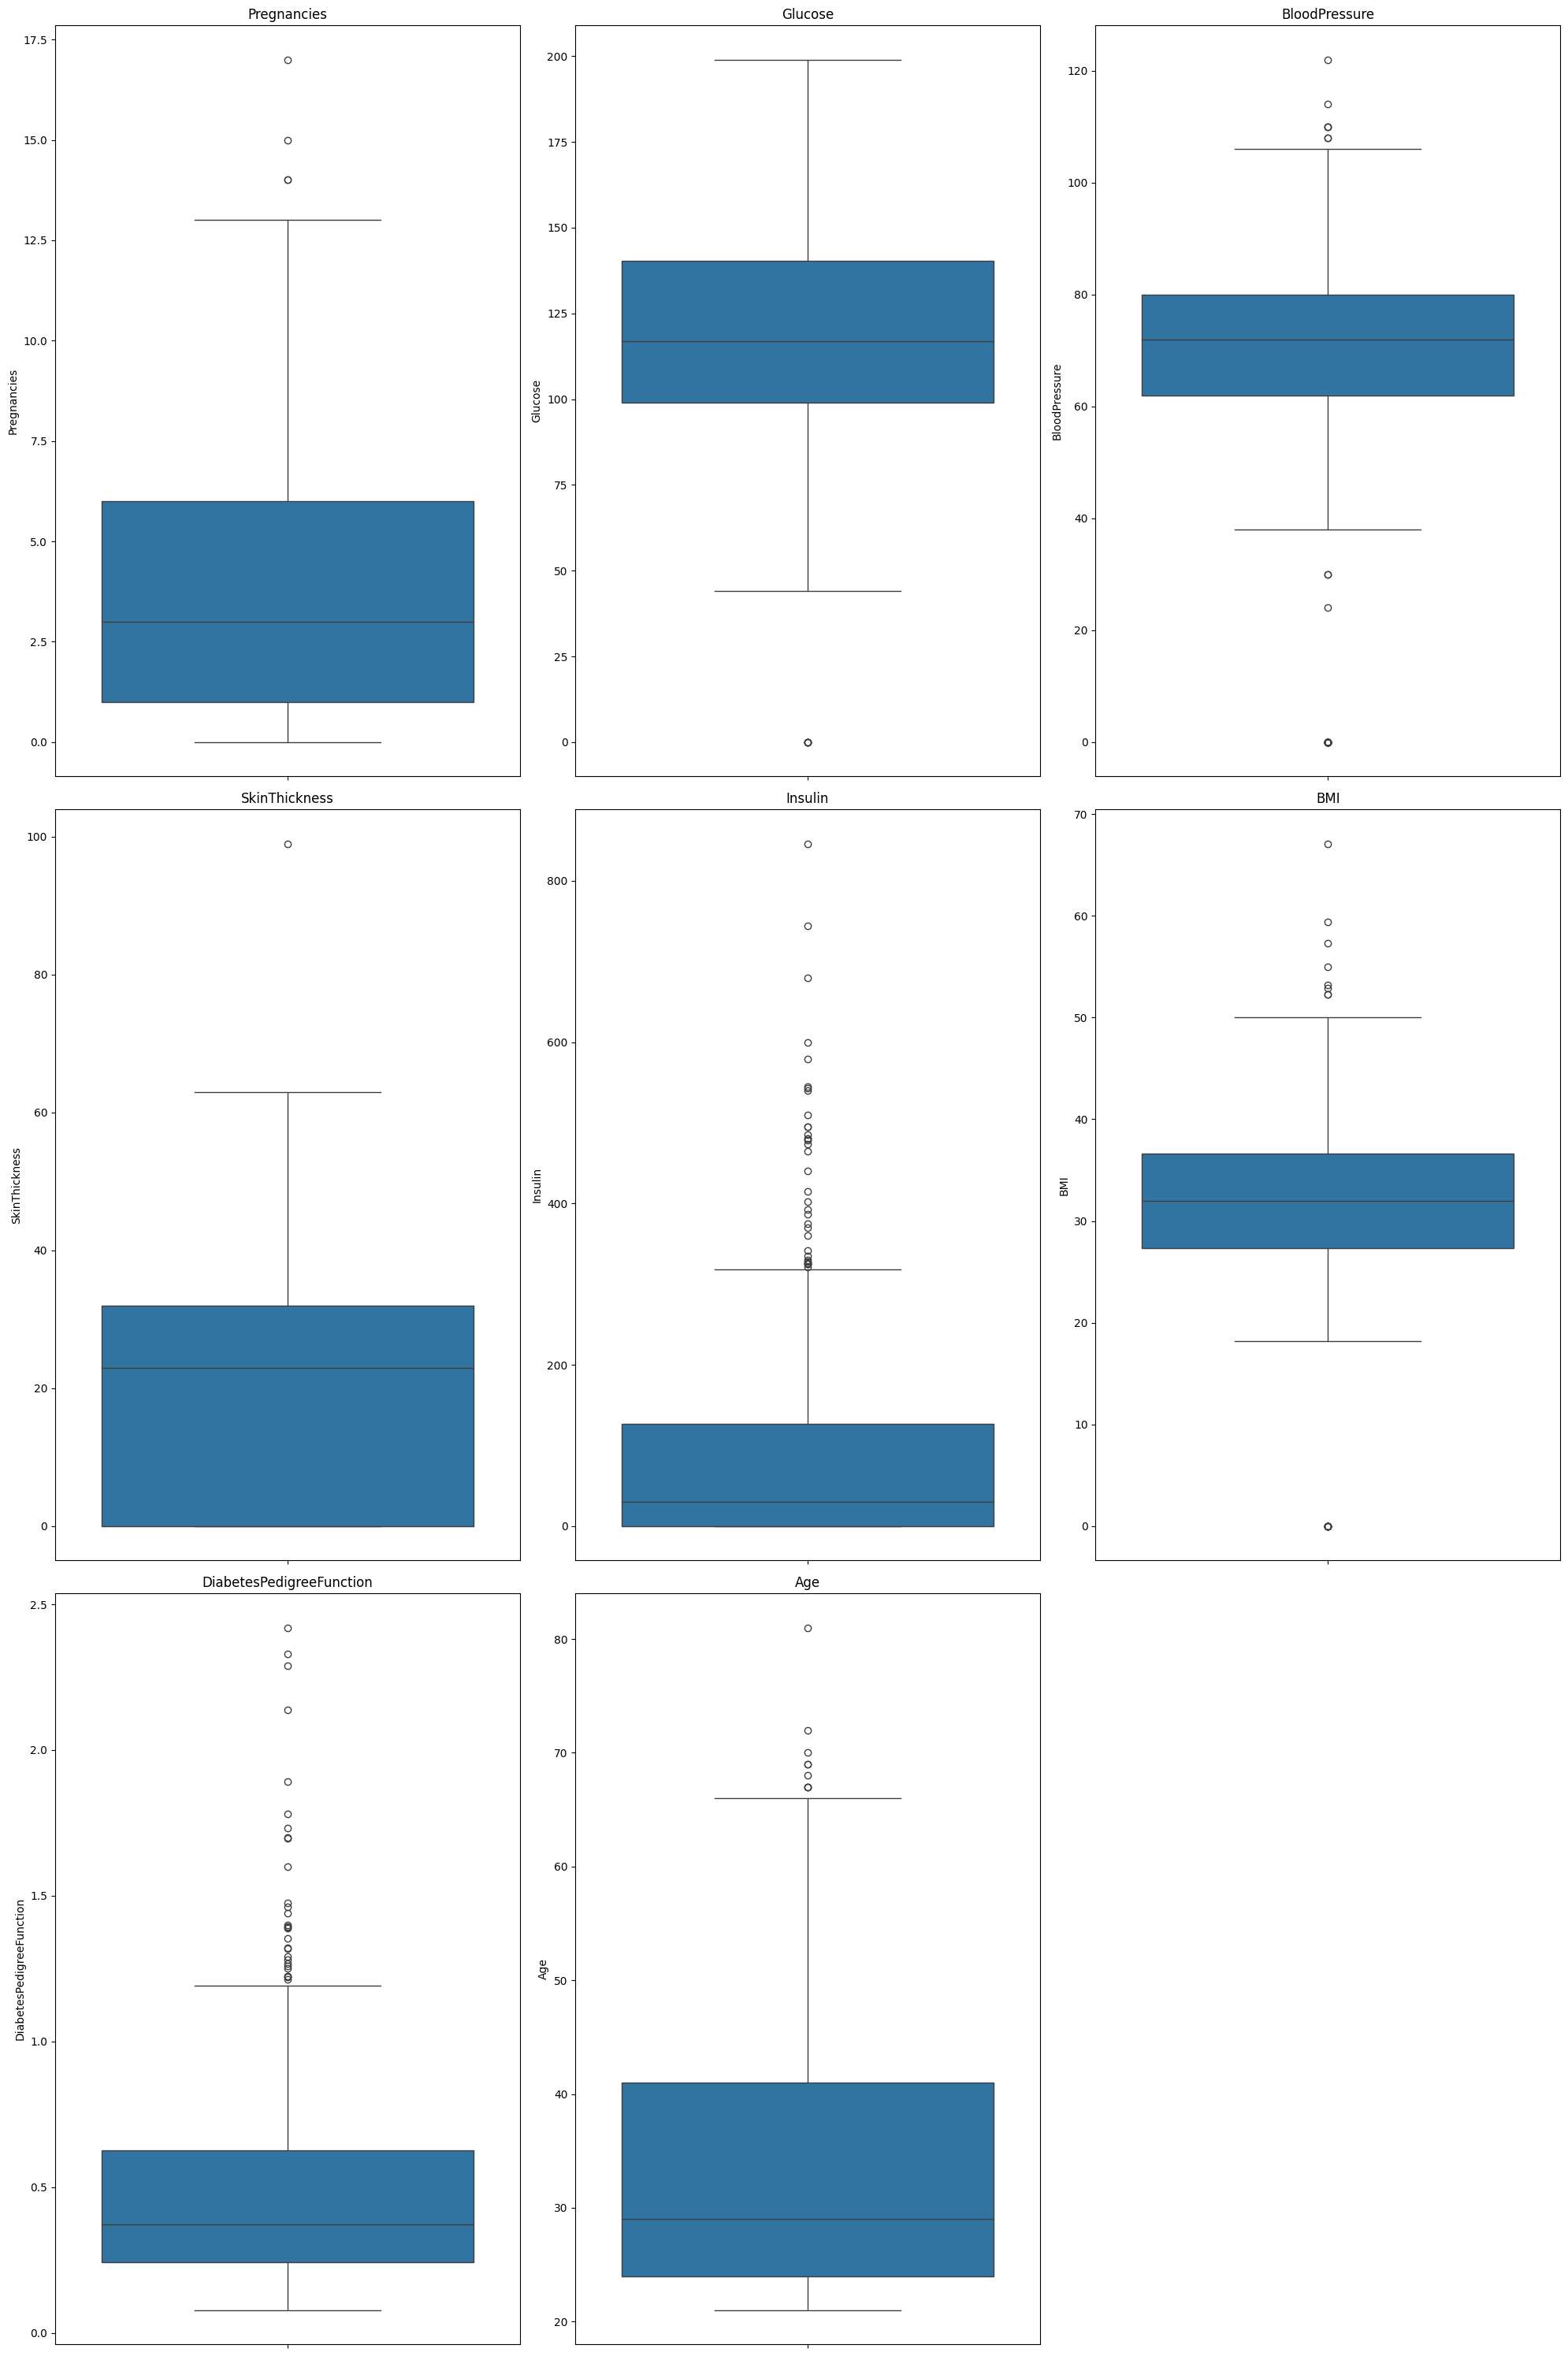

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)
for i,column in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [17]:
# df1 = df1[(df1["BloodPressure"]>40)]#presure must be more than 40
# df1 = df1[(df1["BMI"]<60)&(df1["BMI"]>=10)]
# df1 = df1[(df1["SkinThickness"]<90)&(df1["SkinThickness"]>=0)]
# df1 = df1[(df1["Glucose"]<200)&(df1["Glucose"]>=25)]




there are some outlires but because the data is small and unbalanced can not remove it and we can fix it using scalling

# regression for DiabetesPedigreeFunction

In [18]:
target= df['DiabetesPedigreeFunction']
X= df.drop('DiabetesPedigreeFunction', axis=1)

In [19]:
X= df.drop('Outcome', axis=1)

In [20]:
target

,DiabetesPedigreeFunction
0,0.627
1,0.351
2,0.672
3,0.167
4,2.288
...,...
763,0.171
764,0.340
765,0.245
766,0.349


In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [22]:
# splitting data
X_train, X_test, y_train , y_test = train_test_split(X,target, test_size=0.2, random_state=43)

In [23]:
#scalling data
scale=preprocessing.StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
X_train

array([[-0.54625772, -1.29204091,  0.14646099, ..., -0.27621179,
         0.24117361, -0.6995302 ],
       [-0.54625772, -1.71341254,  0.04479107, ..., -0.92226018,
        -0.85934279, -0.6995302 ],
       [ 0.93913749,  1.94927929,  0.75648053, ...,  0.45850991,
         0.36039622,  1.54876858],
       ...,
       [-1.1404158 , -0.54653726, -0.26021871, ..., -0.56756694,
        -0.04312646, -0.87247625],
       [-0.84333676, -0.25481845, -0.26021871, ...,  0.16715476,
         0.22894565, -1.04542231],
       [ 0.04790037,  0.26379279, -0.46355855, ..., -0.60556979,
         0.18003381, -0.18069202]])

In [24]:
# Create linear regression
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y1_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y1_pred)
acc_test=regr.score( X_test,y_test)
acc_train=regr.score( X_train,y_train)
print("Mean Squared Error:", mse)
print("acc_test:", acc_test)
print("acc_train:", acc_train)


Mean Squared Error: 1.2161122055331401e-31
acc_test: 1.0
acc_train: 1.0


In [25]:
#ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {
    'alpha': [10, 30, 50, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'alpha': 10, 'solver': 'saga'}
Best Estimator: Ridge(alpha=10, solver='saga')


In [26]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
acc_test=ridge.score( X_test,y_test)
acc_train=ridge.score( X_train,y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("acc_test:", acc_test)
print("acc_train:", acc_train)

Mean Squared Error: 3.095473765879786e-05
acc_test: 0.9997416868206832
acc_train: 0.9997301686323569


In [27]:
#lasso
from sklearn.linear_model import Lasso
param_grid = {
    'alpha': [0.01, 0.02, 10, 100],
    'selection': ['cyclic', 'random']
}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'alpha': 0.01, 'selection': 'cyclic'}
Best Estimator: Lasso(alpha=0.01)
Mean Squared Error: 0.00011231737773667125


In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
acc_test=lasso.score( X_test,y_test)
acc_train=lasso.score( X_train,y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("acc_test:", acc_test)
print("acc_train:", acc_train)

Mean Squared Error: 0.00011231737773667125
acc_test: 0.999062726382776
acc_train: 0.9990654812267389


*linear has high accuarcy but it is overfitting
so (ridge) is the best model because it has less Mean Squared Error than lasso*

# classifiction using knn for Outcome

In [29]:
target= df['Outcome']
X= df.drop('Outcome', axis=1)

In [30]:
#spliting
X_train, X_test, y_train , y_test = train_test_split(X,target, test_size=0.2, random_state=7)

In [31]:
# scalling data
scale=preprocessing.StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
X_train

array([[ 0.35483802, -0.370418  ,  0.16624635, ...,  0.49863797,
        -0.61786951,  0.01064085],
       [-0.54794048, -0.55620696,  0.9024924 , ...,  1.70739891,
        -1.0345765 , -0.86049025],
       [ 0.05391185,  1.17782332,  0.48178037, ...,  0.08714489,
         1.03670235, -0.16358537],
       ...,
       [-1.1497928 , -1.94962414, -0.4648217 , ..., -1.35308091,
         0.82834886,  2.97248659],
       [-0.84886664, -0.46331248, -0.56999971, ..., -1.01874278,
        -0.85073518, -1.03471647],
       [ 1.25761651,  1.82808468,  0.16624635, ...,  0.06142657,
         0.77932451,  0.27198018]])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=19, p=3, metric='manhattan')

clf.fit(X_train,y_train)
pred = clf.predict(X_test)
acc = accuracy_score( y_test,pred)
acc

0.7987012987012987

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,pred)

array([[90,  7],
       [24, 33]])

pepole who are not diabetes and i predicted not diabetes=(90)
pepole who are  not diabetes and i predicted diabetes=(7)
pepole who are diabetes and i predicted not diabetes=(24)
pepole who are diabetes and i predicted  diabetes=(33)

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        97
           1       0.82      0.58      0.68        57

    accuracy                           0.80       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



# classification using kmeans

In [35]:
target= df['Outcome']
X= df.drop('Outcome', axis=1)

In [36]:
# scalling data
scale=preprocessing.StandardScaler()
x=scale.fit_transform(X)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)
cluster_labels = kmeans.labels_
print(cluster_labels)

[1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
print(confusion_matrix(target, kmeans.labels_))

[[373 127]
 [123 145]]


pepole who are not diabetes and i predicted not diabetes=(373)
pepole who are  not diabetes and i predicted diabetes=(127)
pepole who are diabetes and i predicted not diabetes=(123)
pepole who are diabetes and i predicted  diabetes=(145)

In [39]:
print(classification_report(target, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       500
           1       0.53      0.54      0.54       268

    accuracy                           0.67       768
   macro avg       0.64      0.64      0.64       768
weighted avg       0.68      0.67      0.68       768



# for deep learning

In [40]:
target= df['Outcome']
X= df.drop('Outcome', axis=1)

In [41]:
X_train, X_test, y_train , y_test = train_test_split(X,target, test_size=0.2, random_state=43)

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [43]:
df["Outcome"].value_counts()


,count
Outcome,
0,500
1,268


In [44]:
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (614, 8)
x_test shape:  (154, 8)
y_train shape:  (614,)
y_test shape:  (154,)


In [45]:
#scaling data
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

x_train = scaler.transform(X_train)

x_test = scaler.transform(X_test)
#convert to numpy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [46]:
# Create Sequential Model
model = keras.models.Sequential()
model.add(Dense(16, activation='relu')),
Dropout(0.1),
model.add(Dense(8, activation='relu')),
Dropout(0.1),
model.add(Dense(8, activation='relu')),
model.add(Dense(1, activation='sigmoid'))


In [47]:
model.compile(optimizer= 'Adam',
              loss= 'binary_crossentropy',
              metrics= ["accuracy"])


In [48]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_split = 0.1,
                    batch_size=32,
                    )

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5226 - loss: 0.6875 - val_accuracy: 0.5806 - val_loss: 0.6990
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6335 - loss: 0.6712 - val_accuracy: 0.7258 - val_loss: 0.6797
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7187 - loss: 0.6477 - val_accuracy: 0.7419 - val_loss: 0.6621
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7344 - loss: 0.6307 - val_accuracy: 0.7419 - val_loss: 0.6441
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7407 - loss: 0.6168 - val_accuracy: 0.7419 - val_loss: 0.6248
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7404 - loss: 0.6012 - val_accuracy: 0.7419 - val_loss: 0.6034
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7427 - loss: 0.5792 - val_accuracy: 0.7581 - val_loss: 0.5764
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.5486 - val_accuracy: 0.7903 - val_lo

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,085 (4.24 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 724 (2.83 KB)

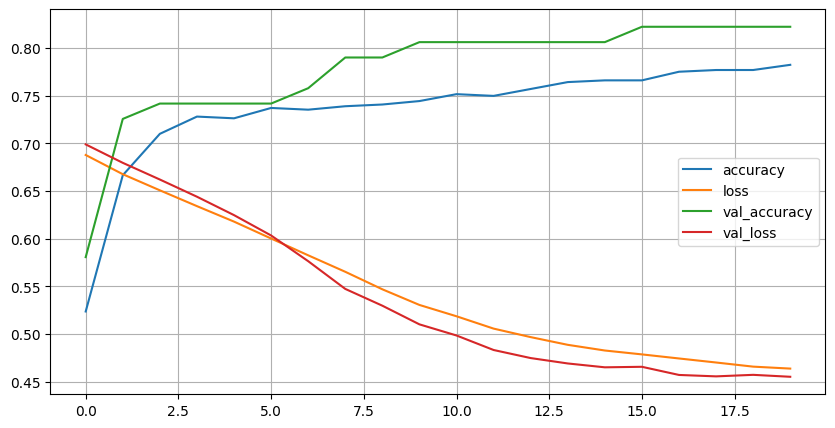

In [50]:

learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [51]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7580 - loss: 0.5042 


[0.4923709034919739, 0.7532467246055603]

In [52]:
y_pred = np.round(model.predict(x_test))
print(y_pred.shape)
print(y_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(154, 1)
(154,)
(154, 1)


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)

array([[90, 10],
       [28, 26]])

pepole who are not diabetes and i predicted not diabetes=(90)
pepole who are  not diabetes and i predicted diabetes=(10)
pepole who are diabetes and i predicted not diabetes=(28)
pepole who are diabetes and i predicted  diabetes=(26)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.72      0.48      0.58        54

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154

